<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Advanced Topic Notebook 4: Interactive `IPython` widgets

In this Notebook, we learn how to add interactivity to graphs using `IPython` widgets. A widget (phonetic: ˈwɪdʒɪt') is an interactive part of a user interface. Examples are *radio buttons*, where you can select only one button at a time, *check buttons*, where you can select multiple buttons at a time, and *sliders* which you can, well, slide to change something in the graph.

IPython widgets are still in a somewhat experimental state, but they are very cool. New features will be added in the future and some of the current features may change. This Notebook is designed to use IPython3. If you are still using IPython2 (you can see this in the Anaconda Launcher), then click on the *update* button next to IPython in the launcher and update to the latest version. In the computer room this may not be possible and you will need to use some older syntax and you can not use the `description` keyword, as indicated in the code cells below. Note that IPython3, the interactive python package, still runs Python version 2.7 (there is no relationship between version numbers of IPython and Python; *don't* update to Python 3.X).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Creating a widget
The process for creating a widget that can change something on a graph is the same for each widget:

1. Write a function that creates the graph
2. Make sure the input arguments of the function are the things you want to change.
3. Use the `interact` function of the `IPython.html.widgets` package to add interactivity to your graph
4. Specify the widgets to be used as the keywords of the `interact` function. 

###Slider
Consider the graph of a circle. We will add a slider to change the radius of the circle. First we write a function that draws the circle and takes as input argument the radius of the circle.

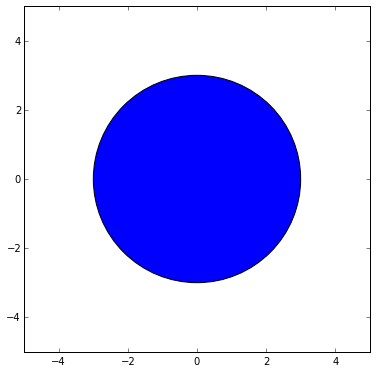

In [2]:
from matplotlib.patches import Circle
def plot_circle(r=1):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    c = Circle((0,0),radius=r)
    ax1.add_patch(c)
plot_circle(r=3)

An interactive slider can be created with the `interact` function. The first argument of the `interact` function is the method that `interact` should call (in this case `plot_circle`), and as a keyword argument, the radius `r` is used, which is the first argument of the `plot_circle` method. The value of `r` is defined as a tuple, which are the minimum and maximum values of the slider. Note that you can move the slider to select different radii between the specified min and max values of 1 and 5, respectively. The slider sets integer values of the radius by default. Also note the grey X in the upper right hand corner. When the X is clicked, the slider disappears.

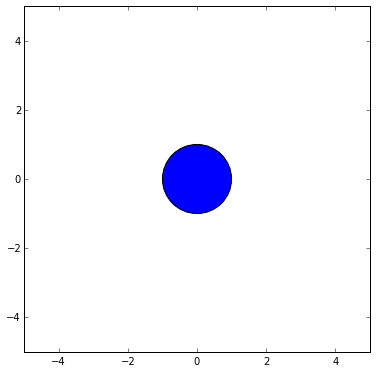

In [3]:
from IPython.html.widgets import interact
interact(plot_circle,r=(1,5)); 

The values of the slider may be changed into floats by making sure that at least one of the min/max values is a float. A step may also be defined by adding a third number to the tuple. For example, `r=(1,5,0.5)` allows the slider to change the radius from 1 to 5 with steps of 0.5.

Multiple sliders may be added by specifying multiple keywords. For example, the $x$-location of the center of the circle may be changed in addition to the radius by creating a function that takes both the radius and the $x$-location of the circle as input argument and then use the `interact` command with two keyword arguments.

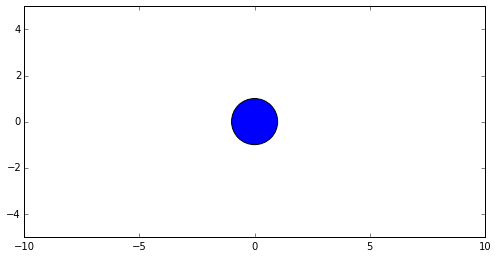

In [4]:
def plot_circle(r=1,x0=0):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(-5,5)
    c = Circle((x0,0),radius=r)
    ax1.add_patch(c)
    
interact(plot_circle,r=(1.0,5,0.1),x0=(-5.0,5.0,0.1));

###Exercise 1
Load the $x,y$ values of 20 data points from the file `xydata.txt`. Develop a function that plots 20 blue dots for the data points and a red straight line $y=ax+b$ on the same graph, where $a$ and $b$ are input arguments of the function. The function should compute the sum of squared errors, which is the sum of the squared difference between the line and the the 20 data points, and show the sum of squared errors in the title of the graph. Add two sliders to the graph to vary $a$ and $b$. Use the sliders to vary $a$ and $b$ so that you obtain a good fit of the straight line through the data. Try to minimize the sum of squared errors.

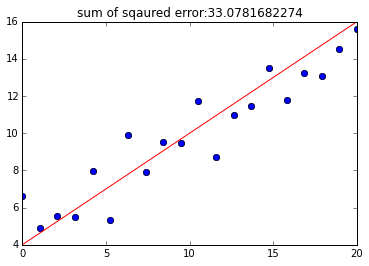

In [5]:
x,y = np.loadtxt('xydata.txt')
def fitline(a,b):
    plt.plot(x,y,'bo')
    yfit = a*x + b
    sum_sq_error = np.sum((y-yfit)**2)
    plt.plot(x,y,'bo')
    plt.plot(x,yfit,'r')
    plt.title('sum of sqaured error:'+str(sum_sq_error))
interact(fitline,a=(0.2,1,0.01),b=(0.0,8));

###Dropdown widget
A dropdown widget can be added with the `interact` command by specifying a list of strings. For example, the color of the circle example used above, can be changed interactively as follows

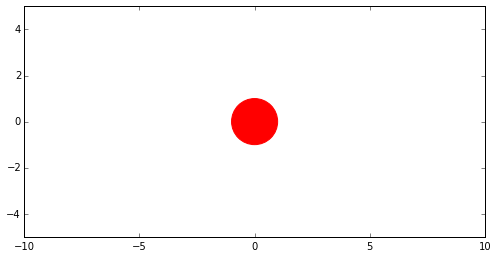

In [6]:
def plot_circle(r=1,x0=0,color='b'):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(-5,5)
    c = Circle((x0,0),radius=r,color=color)
    ax1.add_patch(c)
    
interact(plot_circle,
         r = (1.0, 5, 0.1),
         x0 = (-5.0, 5.0, 0.1),
         color = ['red','blue','green']);

###Exercise 2
Create a graph that displays a filled ellipse centered at $(x,y)=(0,0)$ by using the `Ellipse` patch. Add sliders to change the width and height of the ellipse (between 1 and 5), the angle (between $-180^\circ$ and $+180^\circ$), and a dropdown widget to select the color between 'Aqua','Chocolate', or 'Fuchsia'.

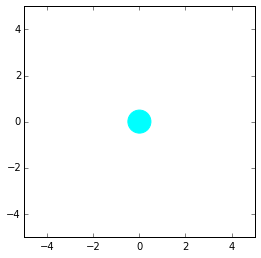

In [7]:
from matplotlib.patches import Ellipse
def plot_ellipse(a=1,b=1,angle=0,color='b'):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    e = Ellipse(xy=(0,0),width=a,height=b,angle=angle,color=color)
    ax1.add_patch(e)
interact(plot_ellipse,
         a=(1, 5, 0.1), 
         b=(1, 5, 0.1), 
         angle=(-180, 180),
         color=['Aqua', 'Chocolate', 'Fuchsia']);

###Different types of widgets
There are many different types of widgets. The slider and dropdown widget are the easiest to use with `interact`, as you simply specify a range of values (for a slider) or a list of words (for a dropdown widget). All other widgets must be imported from the `IPython.html.widgets` package and be called directly, but still within the `interact` command. A current list of IPython widgets may be found [here](http://nbviewer.ipython.org/github/datadave/ipython-in-depth/blob/master/notebooks/Interactive%20Widgets/Widget%20List.ipynb)

The slider and dropwdown widget can be used in the same fashion as the other widgets. For example, the `FloatSlider` widget and `Dropdown` widget can be called explicitly to create the same interactive graph with a circle, as shown above Exercise 2. Note that there is slightly different syntax for IPython2 and IPython3.

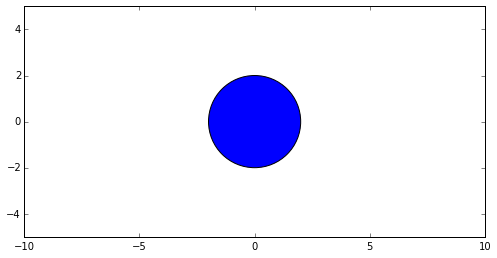

In [8]:
# IPython2 code
import IPython.html.widgets as widgets
interact(plot_circle,
         r = widgets.FloatSliderWidget(min = 1, max = 5, step = 0.1, value = 2),
         x0 = widgets.FloatSliderWidget(min = -5, max =  5, step = 0.1, value = 0),
         color = widgets.DropdownWidget(values = ['red','blue','green']) );

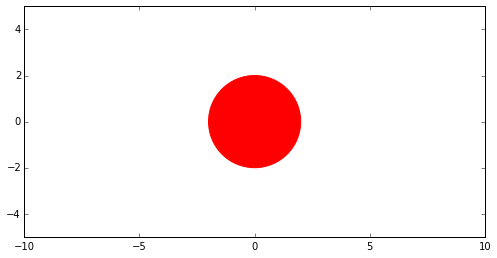

In [9]:
# IPython3 code
import IPython.html.widgets as widgets
interact(plot_circle,
         r = widgets.FloatSlider(min = 1, max = 5, step = 0.1, value = 2),
         x0 = widgets.FloatSlider(min = -5, max =  5, step = 0.1, value = 0),
         color = widgets.Dropdown(options = ['red','blue','green'], description = 'Color:') );

###Textbox widgets
Text widgets may be used to enter text of numbers. The `Text` widget is used to enter text. Here, text widgets are used to enter numbers. Let's start with the previous example, and replace the slider for the radius with a text `FloatText` widget where you can enter any number, and replace the slider for the $x$ location of the center of the circle by a `BoundedFloatText` widget, where a number can be entered between specified min and max values. 

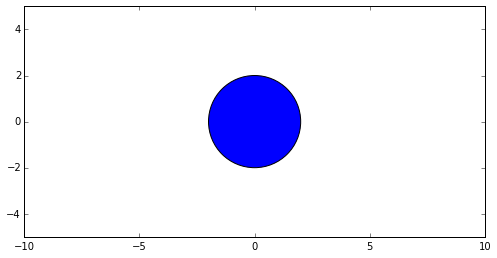

In [10]:
# Ipython2 code
interact(plot_circle,
         r = widgets.FloatTextWidget(value = 2, min = 1, max = 5),
         x0 = widgets.BoundedFloatTextWidget(value = 0, min = -5, max =  5),
         color = widgets.DropdownWidget(values = ['red','blue','green']) );

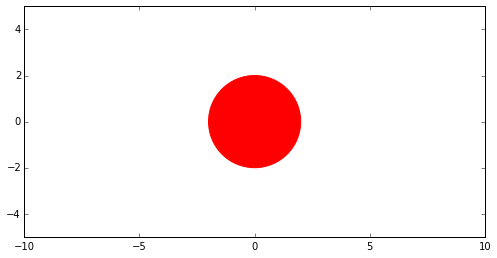

In [11]:
# Ipython3 code
interact(plot_circle,
         r = widgets.FloatText(value = 2, min = 1, max = 5),
         x0 = widgets.BoundedFloatText(value = 0, min = -5, max =  5),
         color = widgets.Dropdown(options = ['red','blue','green'], description = 'Color:') );

###Checkbox widget.
A `Checkbox` widget can be checked (in which case it is `True`) or not (in which case it is `False`). In the graph below, a `Checkbox` widget is used to select whether a legend is added to the graph.t

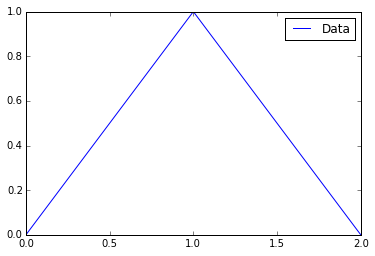

In [12]:
def plot_line(showlegend=True):
    plt.plot([0,1,2],[0,1,0],'b',label='Data')
    if showlegend: plt.legend(loc='best')
#IPython2 code
interact(plot_line, showlegend=widgets.CheckboxWidget(value=True));
#IPython3 code
#interact(plot_line, showlegend=widgets.Checkbox(value=True, description='Show Legend:'));

###Exercise 3
Consider a 10 m thick soil layer. The surcharge on top of the soil layer is $\sigma_0$. The phreatic surface is a distance $d$ below the top of the soil layer. The volumetric weight of the dry soil is 16 kN/m$^3$, while the volumetric weight of the saturated soil is 20 kN/m$^3$. Capillary rise is neglected. Create a function that plots, in one graph, the variation with depth of the total stress $\sigma$, the water pressure $p$, and the effective stress $\sigma'$. The vertical axis points vertically down. Add axis labels and a legend to your graph. The input of the function should be the depth of the water table $d$ and the surcharge at the surface $\sigma_0$. Refer to chaper 5 in [Verruijt 2012](geo.verruijt.net/software/SoilMechBook2012.pdf) if you forgot how to compute stresses in soils. Add textbox widgets to enter the depth of the water table (between 0 and 10 m) and the surcharge at the surface (between 0 and 100 kN/m$^2$).

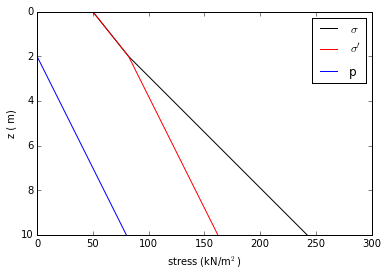

In [13]:
def soilstress(d=2, sig0=20, plotsig=True, plotsigp=True, plotp=True):
    gammadry = 16.0
    gammawet = 20.0
    gammawater = 10.0
    z = np.array([0,d,10])
    sig1 = sig0 + d*gammadry
    sig2 = sig1 + (10-d) * gammawet
    sig = np.array([sig0, sig1, sig2])
    p = np.array([0, 0, (10-d) * gammawater])
    sigp = sig - p
    if plotsig: plt.plot(sig, z, 'k', label=r"$\sigma$")
    if plotsigp: plt.plot(sigp, z, 'r', label=r"$\sigma'$")
    if plotp: plt.plot(p, z, 'b', label = 'p' )
    plt.ylim(10,0)
    plt.xlim(0,300)
    plt.xlabel('stress (kN/m$^2$)')
    plt.ylabel('z ( m)')
    plt.legend(loc='best')

interact(soilstress,
         d = widgets.BoundedFloatTextWidget(value = 2, min = 0, max =  10),
         sig0 = widgets.BoundedFloatTextWidget(value = 50, min = 0, max =  100),
         plotsig = widgets.CheckboxWidget(value=True),
         plotsigp = widgets.CheckboxWidget(value=True),
         plotp = widgets.CheckboxWidget(value=True));

###Exercise 4. 

 The annual variation of daily average soil temperature at different depths may be described as
 
 $$T(z,t) = T_m + \Delta T \exp(-2\pi z/\lambda) \cos[2\pi(t/t_0 - z/\lambda)]$$
 
 where $T(z,t)$ is the temperature at depth $z$ and time $t$, $T_m$ is the mean annual temperature at ground surface, $\Delta T$ is the amplitude of the temperature at ground surface, $t_0=365$ days is the period, and $\lambda$ is the wave length defined as
 
 $$\lambda = 2\sqrt{t_0\pi\alpha}$$
 
 where $\alpha$ is the soil diffusivity, which depends on many things including the soil moisture. Consider a range of $\alpha=0.02-0.06$ m$^2$/day.
 
Write a function that plots the soil temperature vs. depth at 10 equally spaced times throughout the year. Plot the soil temperature along the horizontal axis and the depth along the vertical axis. At the ground surface $z=0$, and $z$ increases downward. Set the limits on the horizontal axis from $-5$ to $+25$ degrees Celcius, and the limits on the vertical axis from 15 to 0 m. The input arguments of the function are the soil diffusivity $\alpha$ and the annual temperature amplitude. Vary the soil diffusivity with a slider from 0.02 to 0.06 m$^2$/d. Set the temperature amplitude with a text widget with a minimum value of 5 and a maximum value of 15 degrees Celcius. Set the mean annual temperature to 10 degrees Celcius.

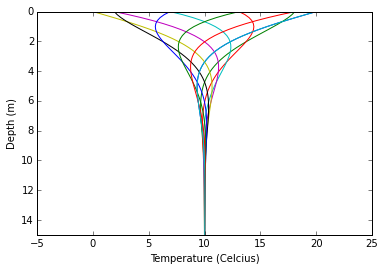

In [14]:
def plot_T(alpha=0.04,delT=10.0):
    Tm = 10
    t0 = 365.0
    z = np.linspace(0,20,100)
    lab = 2 * np.sqrt(t0*np.pi*alpha)
    plt.figure()
    for t in np.linspace(0,t0,11):
        T = Tm + delT * np.exp(-2*np.pi*z/lab) * np.cos(2*np.pi*(t/t0 - z/lab))
        plt.plot(T,z)
    plt.xlim(-5,25)
    plt.ylim(15,0)
    plt.xlabel('Temperature (Celcius)')
    plt.ylabel('Depth (m)')
interact(plot_T, 
         alpha=(0.02,0.06,0.001), 
         delT = widgets.BoundedFloatTextWidget(value = 10, min = 5, max =  15) );